In [71]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

### 1. Відкрити та зчитати наданий файл з даними.

In [72]:
df = pd.read_csv('dataset3_l4.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### 2. Визначити та вивести кількість записів.

In [73]:
print("Кількість записів у файлі: ", df.shape[0])

Кількість записів у файлі:  2111


### 3. Вивести атрибути набору даних.

In [74]:
print("Атрибути набору даних: ", ", ".join(df.columns))

Атрибути набору даних:  Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad


### 4. Ввести з клавіатури кількість варіантів перемішування (не менше трьох) та отримати відповідну кількість варіантів перемішування набору даних та розділення його на навчальну (тренувальну) та тестову вибірки, використовуючи функцію **BShuffleSplit**. Сформувати навчальну та тестову вибірки на основі другого варіанту. З’ясувати збалансованість набору даних.

In [75]:
# Збалансованість початкового набору даних
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [76]:
def input_num_shuffle_splits() -> int:
    try:
        num_splits = int(input("Введіть кількість варіантів перемішування (від трьох до ста): "))
        if num_splits < 3 or num_splits > 100:
            print('\nВведене число виходить за визначені межі!\n')
            return input_num_shuffle_splits()
    except:
        print('\nВведене число не є натуральним. Спробуйте ще раз.\n')
        return input_num_shuffle_splits()

    return num_splits

In [77]:
# Введення з клавіатури кількості варіантів перемішування
num_splits = input_num_shuffle_splits()

test_size = 0.25
# Генерація всіх варіантів перемішування
splits = ShuffleSplit(n_splits=num_splits, test_size=test_size, random_state=10)

all_splits = []
for train_index, test_index in splits.split(df):
    train_df_i = df.iloc[train_index]
    test_df_i = df.iloc[test_index]
    all_splits.append((train_df_i, test_df_i))

# Обираємо другий варіант перемішування
train_df, test_df = all_splits[1] # [1] - другий варіант

# Виведення розмірів навчальної та тестової вибірок
print(f"Розмір навчальної вибірки: {len(train_df)}")
print(f"Розмір тестової вибірки: {len(test_df)} ({test_size*100}% від загальної вибірки)")

print("Перші 10 елементів тестового датасету:")
print(test_df.head(10))

Розмір навчальної вибірки: 1583
Розмір тестової вибірки: 528 (25.0% від загальної вибірки)
Перші 10 елементів тестового датасету:
      Gender        Age    Height      Weight family_history_with_overweight  \
1307    Male  22.936098  1.702825   93.638318                            yes   
1497  Female  18.000000  1.692913   89.938890                            yes   
1891  Female  21.030909  1.718180  133.466763                            yes   
341     Male  20.000000  1.600000   50.000000                             no   
201   Female  41.000000  1.540000   80.000000                            yes   
1466    Male  21.682636  1.818641  105.496975                            yes   
734     Male  18.000000  1.708107   51.314659                            yes   
543   Female  23.000000  1.710182   50.287967                            yes   
1120    Male  23.806789  1.732492   84.557797                            yes   
1123    Male  22.730414  1.758687   89.673648                         

### 5. Використовуючи функцію **KNeighborsClassifier** бібліотеки **scikit-learn**, збудувати класифікаційну модель на основі методу k найближчих сусідів (значення всіх параметрів залишити за замовчуванням) та навчити її на тренувальній вибірці, вважаючи, що цільова характеристика визначається стовпчиком **NObeyesdad**, а всі інші виступають в ролі вихідних аргументів.

In [124]:
k = 3

# Обираємо категоріальні ознаки для кодування у бінарний формат
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Застосовуємо перекодування OneHotEncoder до категоріальних ознак
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_train_features = encoder.fit_transform(train_df[categorical_features])
encoded_test_features = encoder.transform(test_df[categorical_features])

# Заміняємо категоріальні ознаки на закодовані
train_df_encoded = train_df.drop(columns=categorical_features)
test_df_encoded = test_df.drop(columns=categorical_features)

train_df_encoded = pd.concat([train_df_encoded.reset_index(drop=True), 
                              pd.DataFrame(encoded_train_features, columns=encoder.get_feature_names_out(categorical_features))], axis=1)
test_df_encoded = pd.concat([test_df_encoded.reset_index(drop=True), 
                              pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_features))], axis=1)

# Визначаємо x та y для тренувальної вибірки
x_train = train_df_encoded.drop(columns=['NObeyesdad'])
y_train = train_df_encoded['NObeyesdad']

# Визначаємо x та y для тестової вибірки
x_test = test_df_encoded.drop(columns=['NObeyesdad'])
y_test = test_df_encoded['NObeyesdad']

# Будуємо класифікатор k найближчих сусідів
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=k)

# Навчаємо модель
k_neighbors_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 6. Обчислити класифікаційні метрики збудованої моделі для тренувальної та тестової вибірки. Представити результати роботи моделі на тестовій вибірці графічно.

In [125]:
def calc_all_metrics(model: KNeighborsClassifier, x_cord: pd.DataFrame, y_cord: pd.Series)-> dict:
    all_metrics = {'accuracy': 0, 
                   'precision': 0, 
                   'recall': 0, 
                   'f_scores': 0,
                   'MCC': 0, 
                   'BA': 0}

    model_predictions = model.predict(x_cord)

    all_metrics['accuracy'] = accuracy_score(y_cord, model_predictions)
    all_metrics['precision'] = precision_score(y_cord, model_predictions, average='weighted')
    all_metrics['recall'] = recall_score(y_cord, model_predictions, average='weighted')
    all_metrics['f_scores'] = f1_score(y_cord, model_predictions, average='weighted')
    all_metrics['MCC'] = matthews_corrcoef(y_cord, model_predictions)
    all_metrics['BA'] = balanced_accuracy_score(y_cord, model_predictions)

    return all_metrics

In [126]:
metrics_test_df = calc_all_metrics(k_neighbors_classifier, x_test, y_test)
metrics_train_df = calc_all_metrics(k_neighbors_classifier, x_train, y_train)

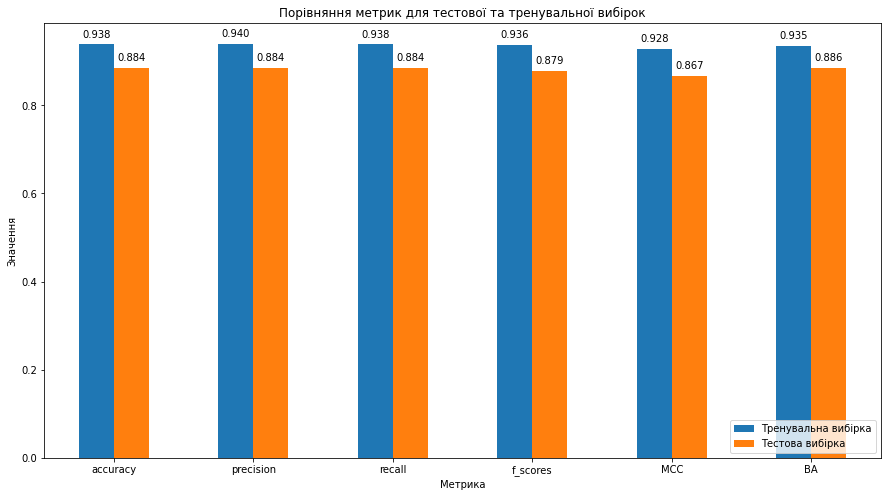

In [127]:
train_and_test_df = pd.DataFrame({'Тренувальна вибірка': metrics_train_df, 'Тестова вибірка': metrics_test_df})

ax = train_and_test_df.plot(kind='bar', figsize=(15, 8))
plt.title('Порівняння метрик для тестової та тренувальної вибірок')
plt.ylabel('Значення')
plt.xlabel('Метрика')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Додавання значень над стовпцями
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}', 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.show()

### 7. З’ясувати вплив степеня метрики Мінковського (від 1 до 20) на результати класифікації. Результати представити графічно.

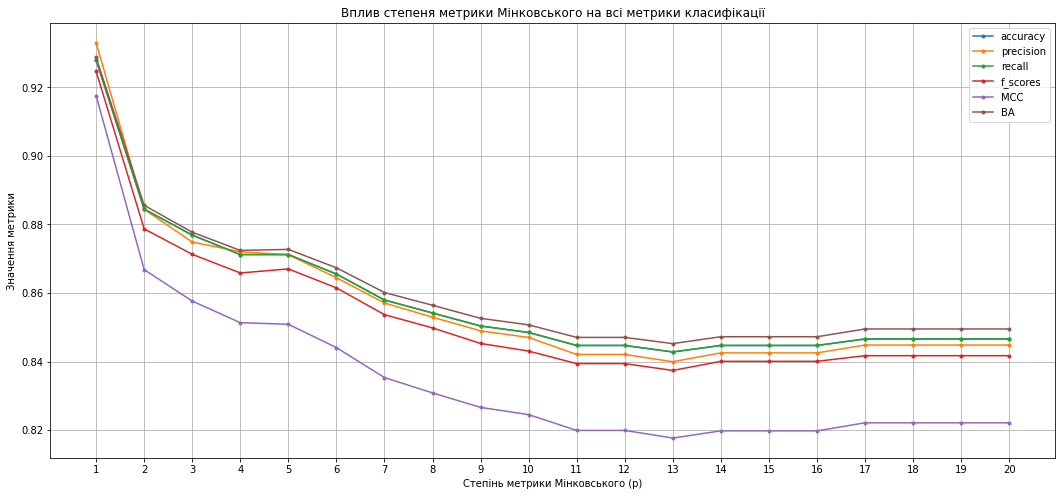

In [129]:
# Змінні для збереження результатів метрик в залежності від параметра метрики Мінковського р
results = {
    'p': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f_scores': [],
    'MCC': [],
    'BA': []
}

for p in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=3, p=p)
    model.fit(x_train, y_train)
    metrics = calc_all_metrics(model, x_test, y_test)
    
    results['p'].append(p)
    results['accuracy'].append(metrics['accuracy'])
    results['precision'].append(metrics['precision'])
    results['recall'].append(metrics['recall'])
    results['f_scores'].append(metrics['f_scores'])
    results['MCC'].append(metrics['MCC'])
    results['BA'].append(metrics['BA'])

# Перетворення результатів в DataFrame
results_df = pd.DataFrame(results)

# Побудова графіку з усіма метриками одночасно
plt.figure(figsize=(18, 8))
metrics = ['accuracy', 'precision', 'recall', 'f_scores', 'MCC', 'BA']
for metric in metrics:
    plt.plot(results_df['p'], results_df[metric], marker='.', label=metric)
plt.title('Вплив степеня метрики Мінковського на всі метрики класифікації')
plt.xlabel('Степінь метрики Мінковського (p)')
plt.ylabel('Значення метрики')
plt.xticks(results_df['p'])
plt.grid(True)
plt.legend()
plt.show()